Linear models for classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split

\begin{align*}
\hat{y} = w_0 x_0 + w_1 x_1 + \dotsc + w_p x_p + b > 0 
\end{align*}
Then classify using 
\begin{align*}
w^Tx+b>0
\end{align*}
If:

- $w^Tx+b>0$ -> class +1
- $w^Tx+b<0$ -> class -1

This is called a linear decision rule. Important:
This rule itself does NOT specify the probability model yet.
It only defines the decision boundary.


| Model                       | What is modeled            | Loss function            |
| --------------------------- | -------------------------- | ------------------------ |
| Linear classifier (general) | Just sign of $w^T x + b$  | Depends on algorithm     |
| Logistic regression         | Log-odds (probabilities)   | Log-loss (cross-entropy) |
| SVM                         | Margin                     | Hinge loss               |


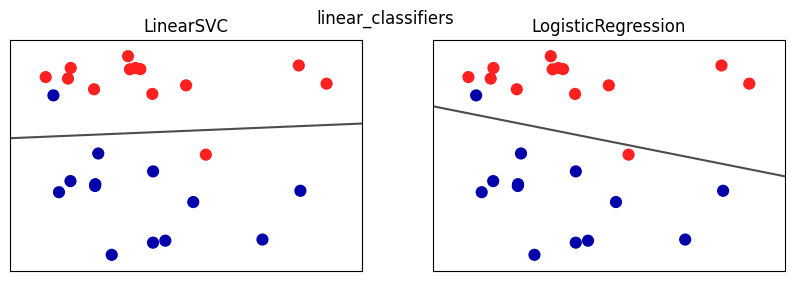

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)


In [3]:
#what does zip do? zip() pairs elements from two lists position by position

list(zip([1, 2], ["a", "b"]))

[(1, 'a'), (2, 'b')]

SVM:
- Only points near the boundary matter.
- Points far away: $yf(x) > 1$
 - zero loss
 - they don't influence solution
 Support vectors are points where:
 $yf(x) < 1$
* If you are correctly classified AND confidently so, I don't care about you.
* If you are close to boundary or wrong, I will penalize you.
 
 That's why SVM is a maximum margin classifier. 

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logisticregression = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.957746
test set score: 0.958042


In [5]:
logisticregression100 = LogisticRegression(C=10, max_iter=50000).fit(X_train, y_train)
print("training set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score %f" % logisticregression100.score(X_test, y_test))

training set score: 0.974178
test set score 0.965035


In [6]:
logisticregression001 = LogisticRegression(C=0.01, max_iter=50000).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.953052
test set score: 0.951049


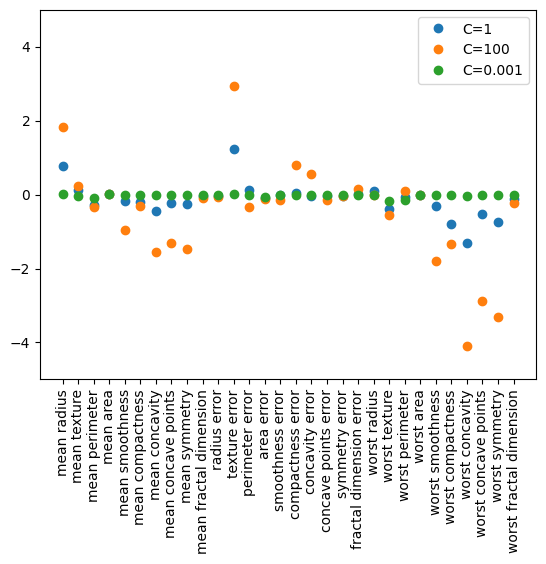

In [7]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

training accuracy of L1 lagreg with C=0.913146
test accuracy of L1 logreg with C=0.923077


/Users/jiayunjin/Documents/Research_codes/Learning Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/jiayunjin/Documents/Research_codes/Learning Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/jiayunjin/Documents/Research_codes/Learning Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_

training accuracy of L1 lagreg with C=0.960094
test accuracy of L1 logreg with C=0.958042
training accuracy of L1 lagreg with C=0.985915
test accuracy of L1 logreg with C=0.979021


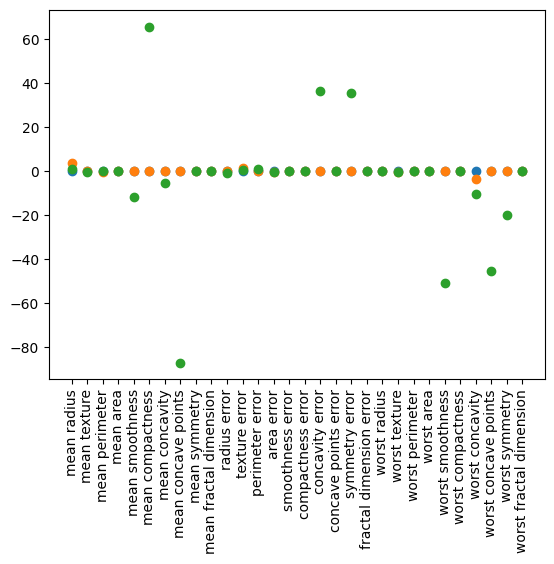

In [8]:
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C,penalty="l1", solver="liblinear").fit(X_train, y_train)
    print("training accuracy of L1 lagreg with C=%f" % lr_l1.score(X_train, y_train))
    print("test accuracy of L1 logreg with C=%f" % lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, "o", label="C=%f" %C)
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

Linear Models for multiclass classification

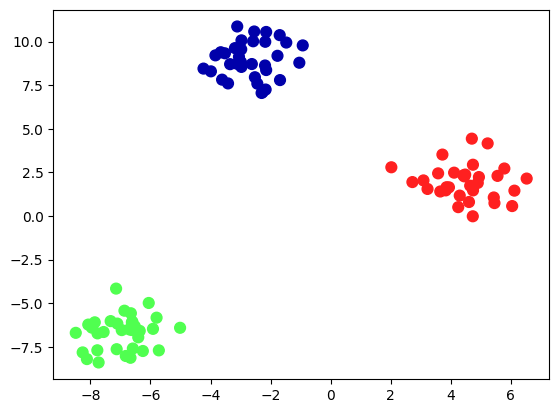

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)

In [10]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492412  0.23140766]
 [ 0.47622012 -0.06936786]
 [-0.18914207 -0.20400079]]
[-1.07745775  0.13139239 -0.08604962]


(-10.0, 8.0)

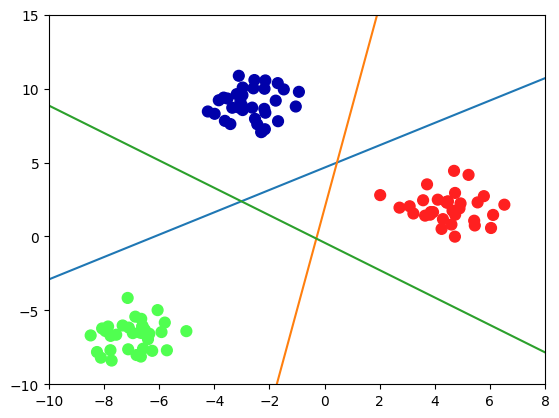

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)

for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

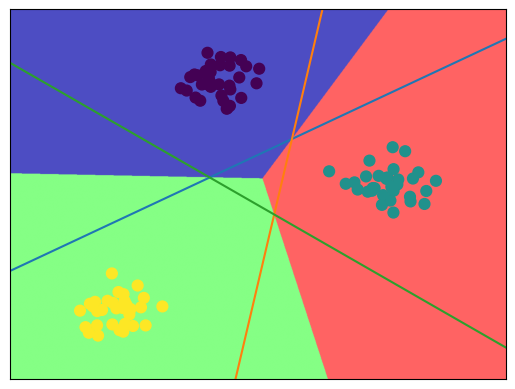

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1])
    

🔹 L1 vs L2 Regularization

L1 Rehularization (Lasso)
\begin{align*}
Loss + \lambda \sum |w_j|
\end{align*}

Use L1 when:
- You believe only a few features are truly important
- You want automatic feature selection
- Interpretability matters
- High-dimensional setting (p large)

Properties:
- Produces sparse models (some coefficients exactly 0)
- Can be unstable when predictors are highly correlated
- Encourages simpler, feature-selective solutions

L2 Regularization (Ridge)
\begin{align*}
Loss + \lambda \sum w_j^2
\end{align*}

Use L2 when:
- Many features contribute a little
- You want more stable solutions
- Features are correlated
- Prediction performance is more important than sparsity

Properties:
- Shrinks coefficients smoothly toward zero
- Does not produce exact zeros
- More stable under multicollinearity

🎯 Rule of thumb:

- Default to L2 unless sparsity or feature selection is explicitly desired.

🔹 Regularization Parameters: \alpha and C

In Ridge and Lasso
Objective:
$Loss + \alpha ||w||^2$
- large alpha -> strong regulariz ation -> smaller coefficients -> simpler model
- small alpha -> weak regularization -> more complex model

In SVM and logistic
Objective:
$C*loss +  ||w||^2$
- small C ->  strong regularization (penalty dominates) -> simpler model
- large C -> weak regularization -> model focuses on minimizing training loss

Relationship:
$C=1/\lambda$

So C and \alpha control the same bias–variance tradeoff but are parameterized differently.